## Import libraries

In [40]:
import json
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # matplotlib is not installed automatically
from datetime import datetime
import warnings

## Load target station info 

In [52]:
os.chdir(r'G:\Shared drives\Ryoko and Hilary\SMSigxSMAP')
network_name = 'Oznet'
station_name = 'Alabama'

input_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxSMAP\analysis\1_data"
output_path = r"G:\Shared drives\Ryoko and Hilary\SMSigxSMAP\analysis\3_data_out"
appeears_path = r"APPEEARS_subsetting"
SMAPL3_path = r"SPL3SMP_E"
SMAPL4_path = r"SPL4SMGP"
SMAPL4_grid_path = r"SMAPL4SMGP_EASEreference"
MODIS_path = r"MOD15A2H"
PET_path = r"dPET_data_4RA"


In [42]:
file_path = os.path.join(input_path, appeears_path, network_name, f'{network_name}-request.json')
with open(file_path, 'r') as infile:
    request_content = json.load(infile)
coordinates = request_content['params']['coordinates']
dates = request_content['params']['dates']
coordinates
# dates
i=0
target_lat = coordinates[i]['latitude']
target_lon = coordinates[i]['longitude']
target_station = coordinates[i]['category']

## Read synched data

In [43]:
file_path = os.path.join(input_path, appeears_path, network_name.upper(), f'timeseries_synced_{station_name}.csv')
ds_synced = pd.read_csv(file_path)
ds_synced['Date'] = pd.to_datetime(ds_synced['Date'])
ds_synced.set_index('Date', inplace=True)

## Read PET data

In [44]:
file_path = os.path.join(input_path, PET_path, station_name)
file_list = os.listdir(file_path)
PET = pd.read_csv(os.path.join(file_path, file_list[0]), header=None)
day_num = PET.index.to_numpy()
year = file_list[0][-8:-4]
PET['Date'] = pd.to_datetime(PET.index, unit='D', origin=pd.Timestamp(year))
PET.set_index('Date', inplace=True)


In [45]:
for i, file in enumerate(file_list):
    PET = pd.read_csv(os.path.join(file_path, file), header=None)
    year = file[-8:-4]
    PET['Date'] = pd.to_datetime(PET.index, unit='D', origin=pd.Timestamp(year))
    PET.set_index('Date', inplace=True)
    if i==0:
        ds_PET = PET
    else:
        ds_PET = pd.concat([ds_PET, PET])
ds_PET = ds_PET.sort_index()
ds_PET = ds_PET.rename(columns = {0:'PET'})

In [46]:

ds_synced2 = pd.merge(ds_synced, ds_PET, how='inner', left_index=True, right_index=True)
ds_synced2


,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_AM_soil_moisture,SPL3SMP_E_005_Soil_Moisture_Retrieval_Data_PM_soil_moisture_pm,soil_moisture_smapL3,precip,noprecip,MODISmeanLAI_SMAPgrid,skippable,PET
Date,,,,,,,,
2015-04-03,NaN,0.051938,0.051938,0.000000,True,0.465525,False,3.57569
2015-04-04,NaN,NaN,NaN,0.000024,False,0.469364,False,1.57448
2015-04-05,NaN,0.166889,0.166889,0.000060,False,0.473204,False,2.28103
2015-04-06,0.215590,0.249511,0.232551,0.000092,False,0.477043,False,1.50429
2015-04-07,NaN,NaN,NaN,0.000074,False,0.480883,False,1.49810
...,...,...,...,...,...,...,...,...
2022-03-23,NaN,0.136632,0.136632,0.000000,True,0.865862,False,4.24280
2022-03-24,NaN,0.113131,0.113131,0.000001,True,0.877763,False,2.75010
2022-03-26,0.083360,0.104119,0.093739,0.000000,True,0.901566,False,3.74955


## Plot

In [47]:
# prep
lat = target_lat
lon = target_lon

smap_color = '#ff7f0e'
precip_color = '#779eb2'

title = f"{network_name}\n({lat:.2f}, {lon:.2f})"
save_title = f"{network_name}_{target_station}"

R:\Temp\ipykernel_2420\2060500672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_synced2['dSdt'][ds_synced2['dSdt']>0] = np.nan
R:\Temp\ipykernel_2420\2060500672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_synced2['values_while_drydown'][drydown_period==False] = np.nan
R:\Temp\ipykernel_2420\2060500672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_synced2['values_while_drydown'][noprecip_with_buffer==False

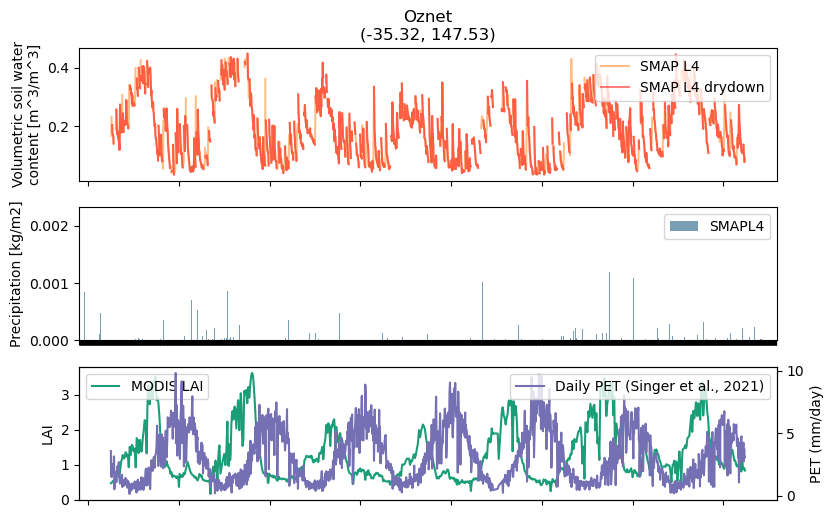

In [68]:
# Get drydown timeseries for plotting
ds_synced2['dSdt'] = ds_synced2['soil_moisture_smapL3'].diff()
ds_synced2['dSdt'][ds_synced2['dSdt']>0] = np.nan
ds_synced2['dSdt(t+1)'] = ds_synced2['dSdt'].shift(periods=-1).copy()
ds_synced2[['soil_moisture_smapL3','dSdt(t+1)', 'noprecip', 'MODISmeanLAI_SMAPgrid']].head(30)

ds_synced2['values_while_drydown'] = ds_synced2['soil_moisture_smapL3']
drydown_period = ds_synced2['dSdt(t+1)'].notna()
drydown_period = drydown_period.shift(periods=+1) | drydown_period
ds_synced2['values_while_drydown'][drydown_period==False] = np.nan
noprecip_with_buffer = (ds_synced2['noprecip']==True) | (ds_synced2['noprecip'].shift(periods=-1)==True)
ds_synced2['values_while_drydown'][noprecip_with_buffer==False] = np.nan

# SMAP timeseries 
fig = plt.figure(figsize=(9, 9))

# fig.subplots(1, 2, sharey=True, sharex=True,  figsize=(10, 5))
ax1 = fig.add_subplot(4,1,1)
line1, = ax1.plot(ds_synced2['soil_moisture_smapL3'], '-', alpha=0.5, label='SMAP L4', color=smap_color)
line2, = ax1.plot(ds_synced2['values_while_drydown'], '-', alpha=0.5, label='SMAP L4 drydown', color='red')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Time")
ax1.set_ylabel("Volumetric soil water\ncontent [m^3/m^3]")
# ax1.set_ylabel("Surface soil moisture [mm/max25mm]")
ax1.legend(loc='upper right')

# Precipitation
ax2 =  fig.add_subplot(4,1,2) #, sharex = ax1)
ds_synced2['precip'].plot.bar(y='first', ax=ax2, label='SMAPL4', color=precip_color)
ax2.set_xlabel("Time")
ax2.set_ylabel("Precipitation [kg/m2]")
ax2.legend(loc='upper right')

# Precipitation
ax3 =  fig.add_subplot(4,1,3) #, sharex = ax1)
ax4 = ax3.twinx()

line3, = ax3.plot(ds_synced2['MODISmeanLAI_SMAPgrid'], '-', label='MODIS LAI', color='#1b9e77')
line4, = ax4.plot(ds_synced2['PET'], '-', label='Daily PET (Singer et al., 2021)', color='#7570b3')
ax3.set_xlabel("Time")
ax3.set_ylabel("LAI")
ax4.set_ylabel("PET (mm/day)")
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

for ind, label in enumerate(ax2.get_xticklabels()):
    if ind % 90 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
fig.autofmt_xdate()
fig.savefig(os.path.join(output_path, f'{save_title}_ts.png'))


## 3D & 2D plots with lAI and PET

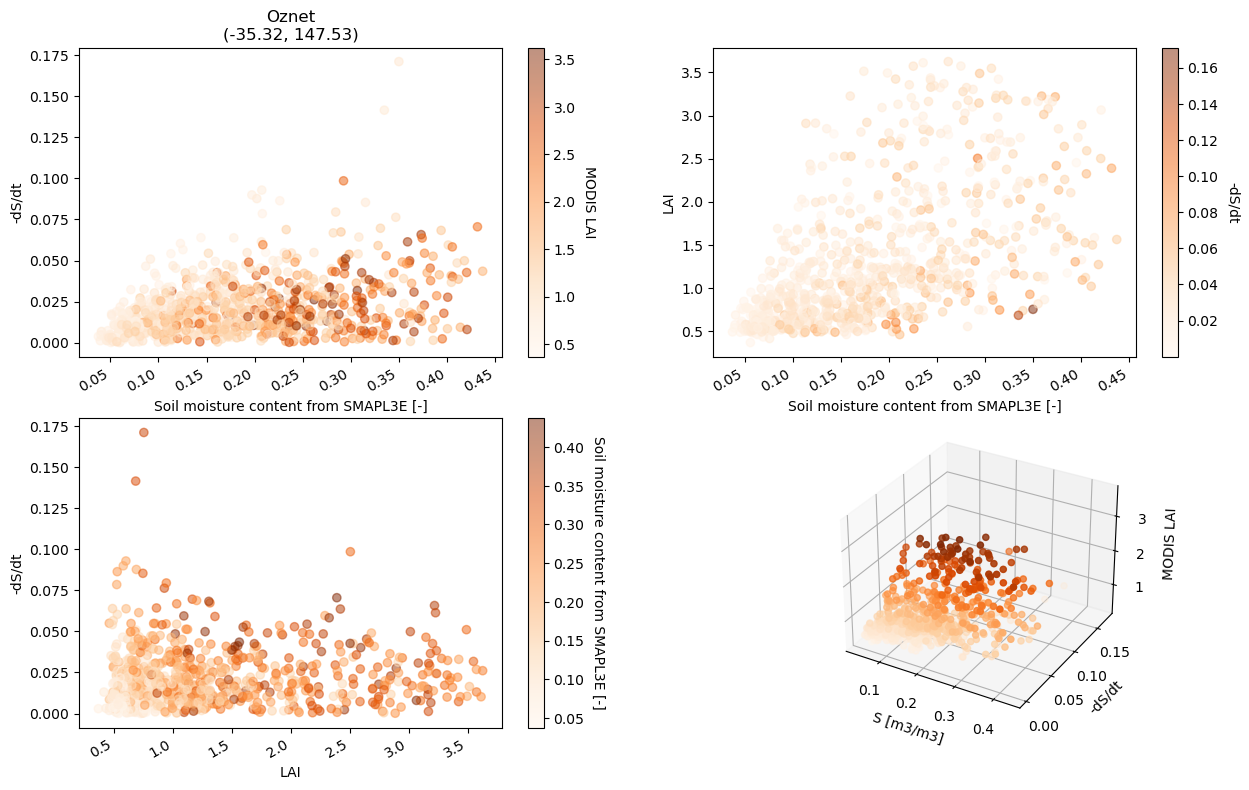

In [72]:
fig = plt.figure(figsize=(15, 10))
fig.tight_layout(pad=5)
sm = ds_synced2['soil_moisture_smapL3'][ds_synced2['noprecip']].values
neg_dSdt = ds_synced2['dSdt(t+1)'][ds_synced2['noprecip']].values*-1
lai = ds_synced2['MODISmeanLAI_SMAPgrid'][ds_synced2['noprecip']].values

ax1 =  fig.add_subplot(2,2,1)
scatter = ax1.scatter(x=sm, y=neg_dSdt, c=lai, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Soil moisture content from SMAPL3E [-]")
ax1.set_ylabel("-dS/dt")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MODIS LAI', rotation=270)
fig.autofmt_xdate()

ax2 =  fig.add_subplot(2,2,2)
scatter = ax2.scatter(x=sm, y=lai, c=neg_dSdt, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax2.xaxis
# ax2.set_title(title)
ax2.set_xlabel("Soil moisture content from SMAPL3E [-]")
ax2.set_ylabel("LAI")
cbar = plt.colorbar(scatter, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('-dS/dt', rotation=270)
fig.autofmt_xdate()

ax3 =  fig.add_subplot(2,2,3)
scatter = ax3.scatter(x=lai, y=neg_dSdt, c=sm, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax3.xaxis
# ax3.set_title(title)
ax3.set_xlabel("LAI")
ax3.set_ylabel("-dS/dt")
cbar = plt.colorbar(scatter, ax=ax3)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Soil moisture content from SMAPL3E [-]', rotation=270)
fig.autofmt_xdate()

from mpl_toolkits import mplot3d

ax4 =  fig.add_subplot(2,2,4, projection='3d')

# Data for a three-dimensional line
ax4.scatter3D(sm, neg_dSdt, lai, c=lai, cmap='Oranges');
ax4.set_xlabel('S [m3/m3]')
ax4.set_ylabel('-dS/dt')
ax4.set_zlabel('MODIS LAI')

fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta.png'))



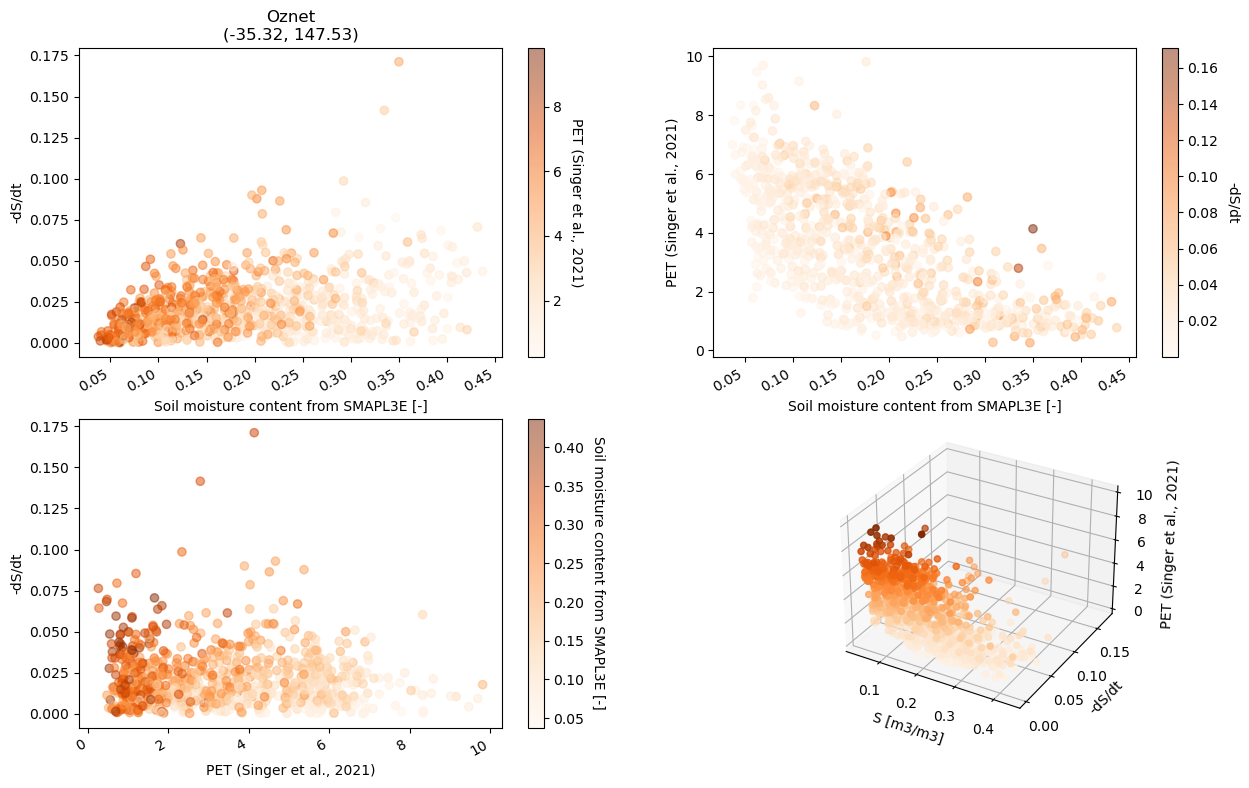

In [74]:
fig = plt.figure(figsize=(15, 10))
fig.tight_layout(pad=5)
sm = ds_synced2['soil_moisture_smapL3'][ds_synced2['noprecip']].values
neg_dSdt = ds_synced2['dSdt(t+1)'][ds_synced2['noprecip']].values*-1
pet = ds_synced2['PET'][ds_synced2['noprecip']].values

ax1 =  fig.add_subplot(2,2,1)
scatter = ax1.scatter(x=sm, y=neg_dSdt, c=pet, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax1.xaxis
ax1.set_title(title)
ax1.set_xlabel("Soil moisture content from SMAPL3E [-]")
ax1.set_ylabel("-dS/dt")
cbar = plt.colorbar(scatter, ax=ax1)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('PET (Singer et al., 2021)', rotation=270)
fig.autofmt_xdate()

ax2 =  fig.add_subplot(2,2,2)
scatter = ax2.scatter(x=sm, y=pet, c=neg_dSdt, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax2.xaxis
# ax2.set_title(title)
ax2.set_xlabel("Soil moisture content from SMAPL3E [-]")
ax2.set_ylabel("PET (Singer et al., 2021)")
cbar = plt.colorbar(scatter, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('-dS/dt', rotation=270)
fig.autofmt_xdate()

ax3 =  fig.add_subplot(2,2,3)
scatter = ax3.scatter(x=pet, y=neg_dSdt, c=sm, cmap= 'Oranges', marker='o', alpha=0.5, label='SMAP L4')
xax = ax3.xaxis
# ax3.set_title(title)
ax3.set_xlabel("PET (Singer et al., 2021)")
ax3.set_ylabel("-dS/dt")
cbar = plt.colorbar(scatter, ax=ax3)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Soil moisture content from SMAPL3E [-]', rotation=270)
fig.autofmt_xdate()

from mpl_toolkits import mplot3d

ax4 =  fig.add_subplot(2,2,4, projection='3d')

# Data for a three-dimensional line
ax4.scatter3D(sm, neg_dSdt, pet, c=pet, cmap='Oranges');
ax4.set_xlabel('S [m3/m3]')
ax4.set_ylabel('-dS/dt')
ax4.set_zlabel('PET (Singer et al., 2021)')

fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_PET.png'))



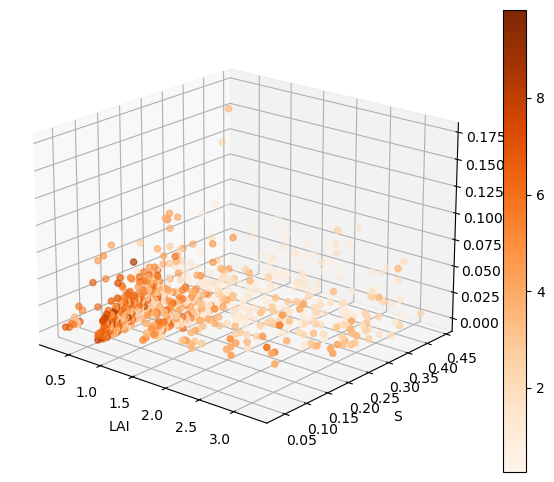

In [140]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
labels = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25]
lai_binned = pd.cut(x = lai, bins = bins, labels = labels, include_lowest = True)

fig = plt.figure(figsize=(8, 6))
fig.tight_layout(pad=5)
ax4 = fig.add_subplot(1,1,1,projection='3d')
# Data for a three-dimensional line
p = ax4.scatter3D(lai_binned, sm, neg_dSdt, c=pet, cmap='Oranges');
ax4.set_xlabel('LAI')
ax4.set_ylabel('S')
ax4.set_zlabel('-dS/dt')
ax4.view_init(20, 310)
fig.colorbar(p, ax=ax4)
fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_3d_binned.png'))


# TODO: Fit the color bar better
# TODO: run for other cells too 
# TODO: adjust the bin label


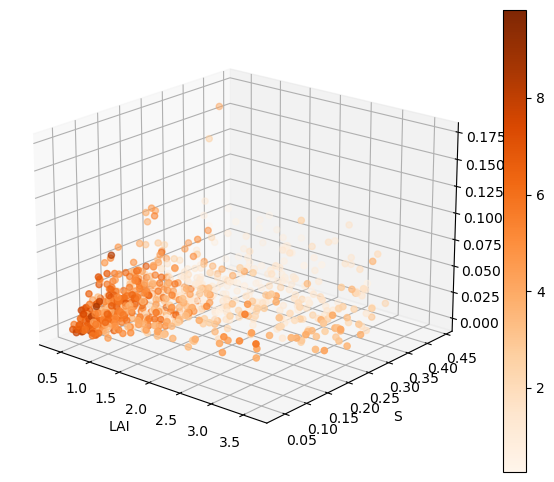

In [142]:
fig = plt.figure(figsize=(8, 6))
fig.tight_layout(pad=5)
ax4 = fig.add_subplot(1,1,1,projection='3d')
# Data for a three-dimensional line
p = ax4.scatter3D(lai, sm, neg_dSdt, c=pet, cmap='Oranges');
ax4.set_xlabel('LAI')
ax4.set_ylabel('S')
ax4.set_zlabel('-dS/dt')
fig.colorbar(p, ax=ax4)
ax4.view_init(20, 310)
fig.savefig(os.path.join(output_path, f'{save_title}_Ltheta_3d.png'))

